**<center> Joaquin Peñuela Parra, Cristian Fernando Rodriguez Cruz <center>**
**<center> University of Los Andes <center>**
**<center> High Energy Physics Group: Phenomenology of Particles <center>**

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 15

!git clone https://github.com/Phenomenology-group-uniandes/Heatmap_Utilities.git
import nbimporter
sys.path.append(f'{os.getcwd()}/Heatmap_Utilities')
from Heatmap_Utilities.Main_Functions import smooth, plot_heatmap

fatal: destination path 'Heatmap_Utilities' already exists and is not an empty directory.


In [2]:
path_statistical_preparation = os.path.join(os.path.dirname(os.getcwd()), '06_Statistical_Preparation')

In [3]:
betards = ['woRHC']
zp_labels = {'zp_upper_limit': r", $\mathbf{M_{Z'}= \sqrt{3/2} M_{U}}$", 'zp_lower_limit':r", $\mathbf{M_{Z'}= \sqrt{1/2} M_{U}}$"}

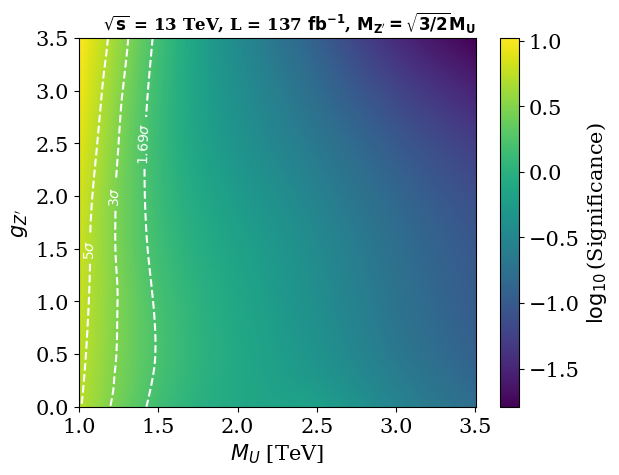

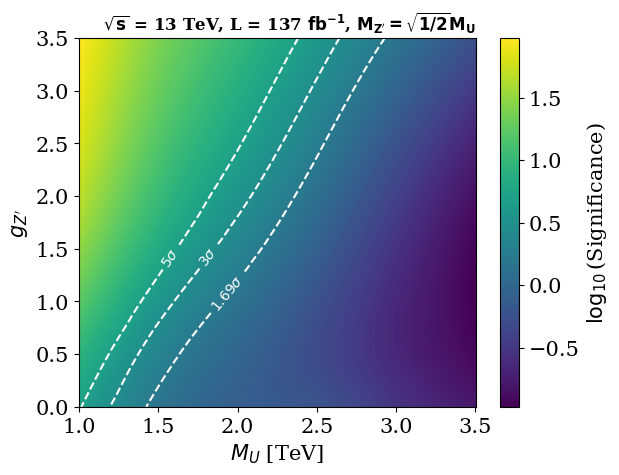

In [20]:
Significances = {}

for betard in betards:
    Significances[betard] = {}
    for zplimit in zp_labels:
        Significances[betard][zplimit] = pd.read_csv(os.path.join('Significances', betard, zplimit, 'significances_G_U_1.75.csv'), index_col = 0)
        Significances[betard][zplimit].columns = [float(i) for i in Significances[betard][zplimit].columns]
        Significances[betard][zplimit].index = [float(i) for i in Significances[betard][zplimit].index]
        
betard_title = {'wRHC': r'$, \mathbf{\beta_{R}}$ = -1', 'woRHC': r'$, \mathbf{\beta_{R}}$ = 0'}

ubicaciones = {'zp_upper_limit': [[1000/1000,1.5], [1250/1000, 2], [1500/1000, 2.5]],
               'zp_lower_limit': [[1500/1000,1.5], [1750/1000, 1.5], [2000/1000, 1]], 
              }

for betard in betards:
    for zplimit in zp_labels:
        Data = Significances[betard][zplimit]
        Data.columns = [float(column)/1000 for column in Data.columns] #TeV
        Data_interpolate = smooth(Data, log = True)
        
        fig, ax, curves = plot_heatmap(Data_interpolate,
                               level_curves = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                               level_curves_labels_locations= ubicaciones[zplimit],
                               x_label = r'$M_{U}$ [TeV]', 
                               y_label = r"$g_{Z'}$", 
                               cbar_label = r'$\log_{10}$(Significance)')        

        #ax.set_xlim(1000/1000,2250/1000)
              
        file_name = f'{zplimit}_{betard}_gu1_75.png'
        plt.title(r'$\mathbf{\sqrt{s}}$ = 13 TeV, L = 137 $\mathbf{fb^{-1}}$' + zp_labels[zplimit], loc = 'right', fontsize = 12, fontweight="bold")
        plt.savefig(file_name, bbox_inches='tight', dpi = 600)